In [33]:
import numpy as np
import matplotlib.pyplot as plt


def lotka_volterra(x, y, a, b, c, e):
    x_prime = a * x - b * x * y
    y_prime = c * x * y - e * y
    return x_prime, y_prime


main_params = [
    {"a": 0.2, "c": 0.2},
    {"a": 0.2, "c": 0.8},
    {"a": 0.8, "c": 0.2},
    {"a": 0.8, "c": 0.8},
]

params = [
    (
        i["a"],
        1 - i["a"],
        i["c"],
        1 - i["c"],
    )
    for i in main_params
]


def main(mode=None):

    # grid
    x_values = np.linspace(0, 10, 20)
    y_values = np.linspace(0, 10, 20)
    X, Y = np.meshgrid(x_values, y_values)

    # plot setup
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle("Lotka-Volterra System")

    for idx, (a, b, c, e) in enumerate(params):
        ax = axs[idx // 2, idx % 2]

        U, V = lotka_volterra(X, Y, a, b, c, e)
        # log scaling vector field
        U = np.sign(U) * np.log1p(np.abs(U))
        V = np.sign(V) * np.log1p(np.abs(V))

        ax.plot(0, 0, "rx", markersize=8, label="fixed point (saddle)")
        ax.plot(e / c, a / b, "ro", markersize=8, label="fixed point (center)")

        vline = lambda l1, l2: ax.axvline(
            x=l1,
            ymin=0,
            ymax=10,
            color="blue",
            linestyle="--",
            label=l2,
        )
        hline = lambda l1, l2: ax.axhline(
            y=l1,
            xmin=0,
            xmax=10,
            color="purple",
            linestyle="--",
            label=l2,
        )
        vline(0, "x nullcline (x=0)")
        vline(e / c, "x nullcline (x=e/c)")
        hline(0, "y nullcline (y=0)")
        hline(a / b, "y nullcline (y=a/b)")

        if mode == "quiver":
            ax.quiver(X, Y, U, V, color="teal", angles="xy", scale_units="xy", scale=3)
        if mode == "stream":
            ax.streamplot(X, Y, U, V, density=1.5, linewidth=0.5, color="blue")
        ax.set_title(f"Set {idx+1}: a={a:.2f}, b={b:.2f}, c={c:.2f}, e={e:.2f}")
        ax.set_xlabel("Prey Population (x)")
        ax.set_ylabel("Predator Population (y)")
        ax.set_xlim(-1, 10)
        ax.set_ylim(-1, 10)
        ax.legend()
        ax.grid()

    plt.tight_layout(rect=[0, 0, 1, 0.99])  # make room for the main title
    plt.show()

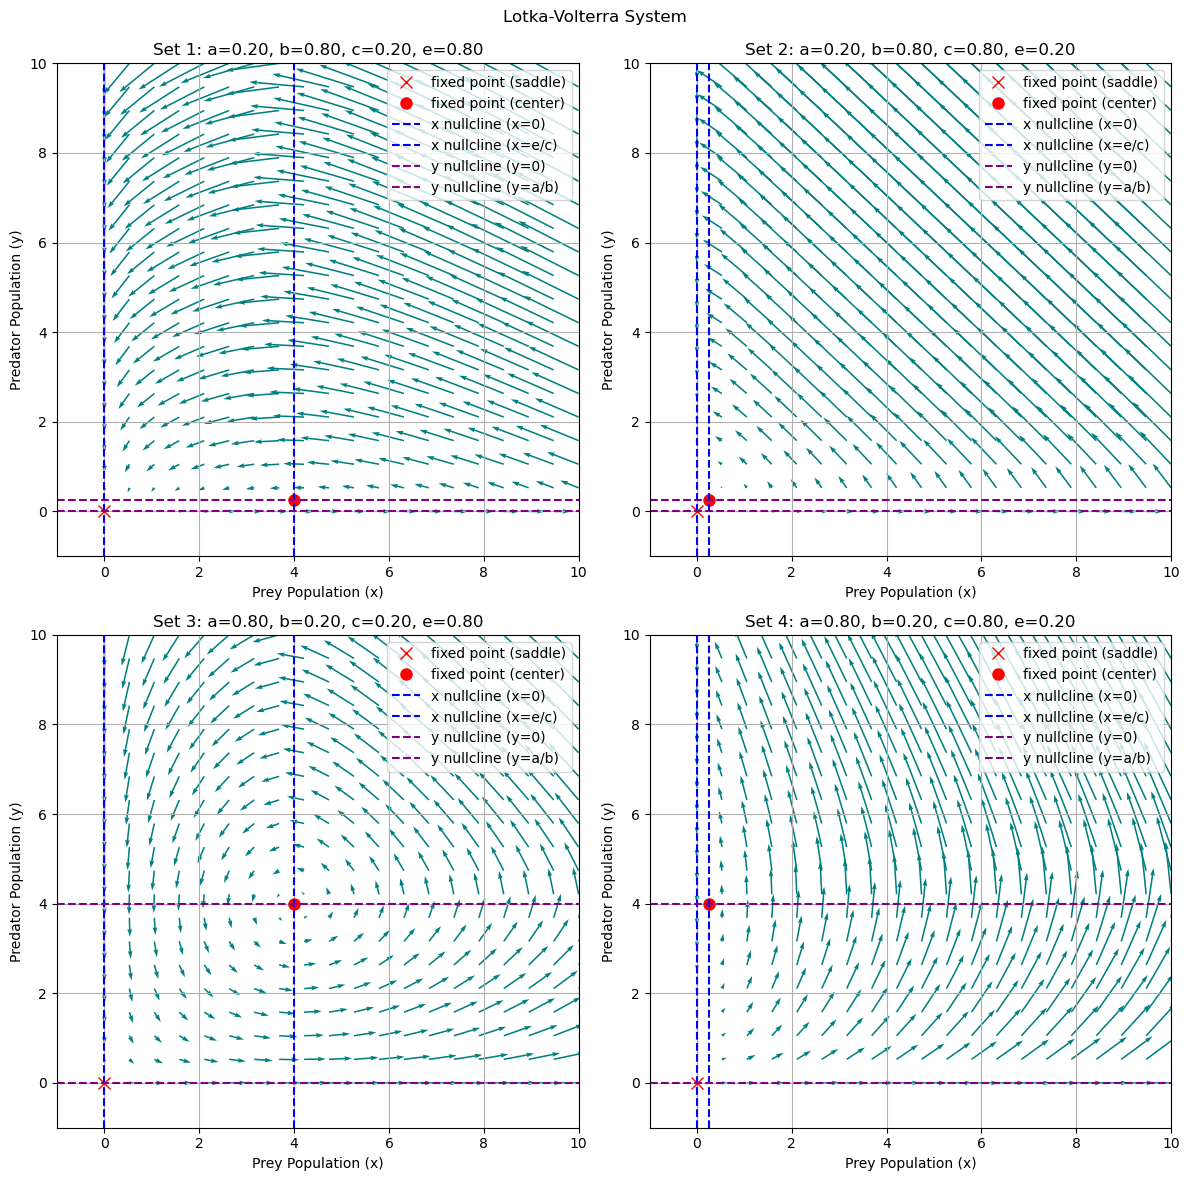

In [34]:
main("quiver")

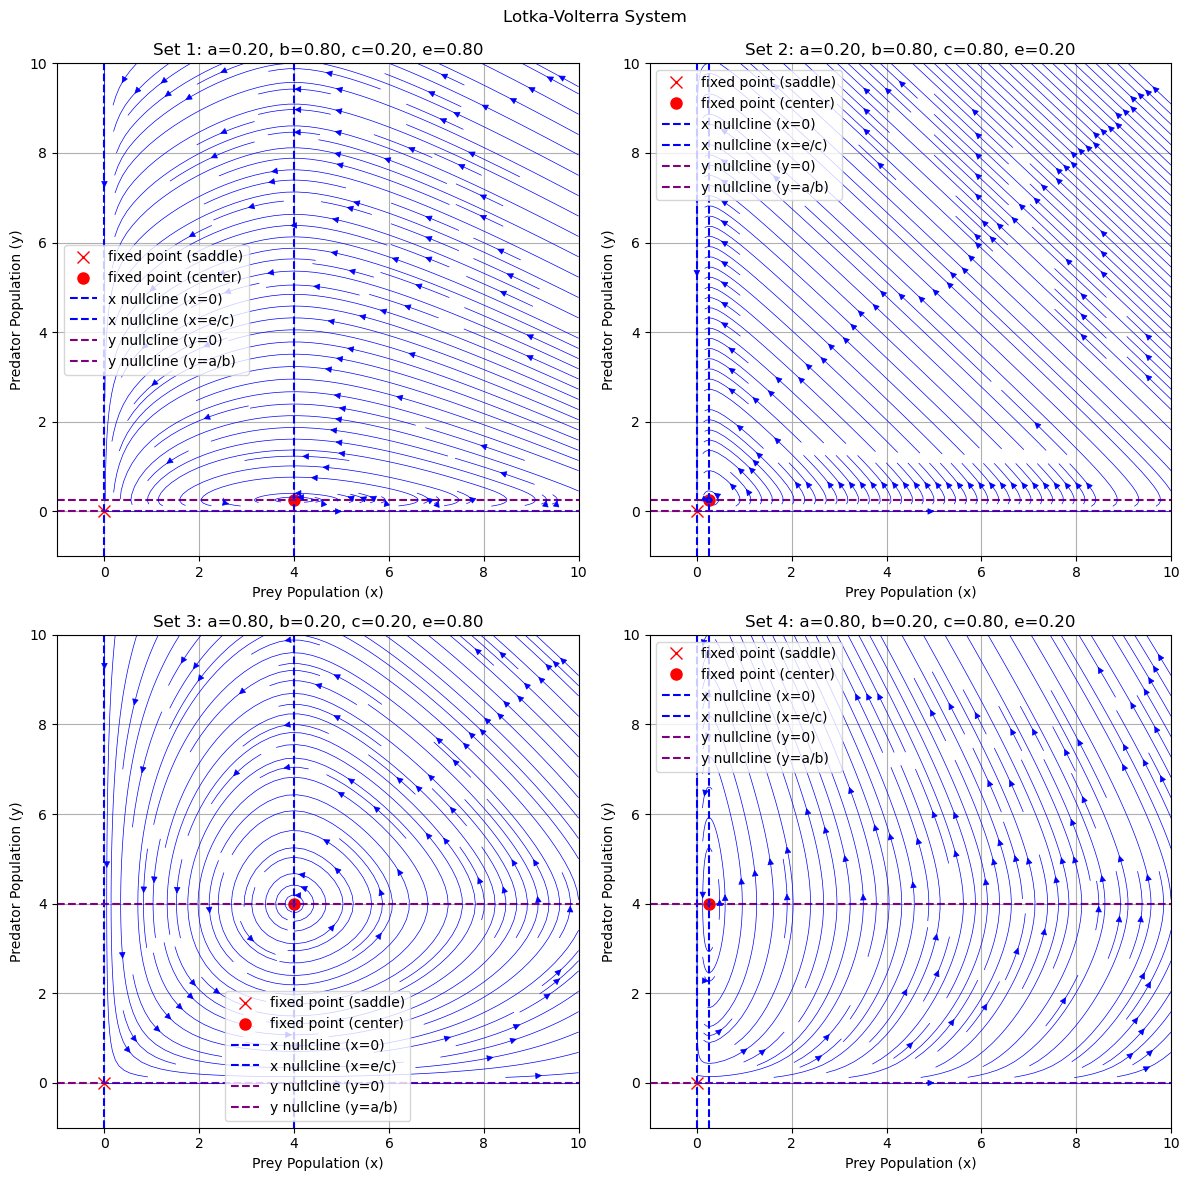

In [35]:
main("stream")

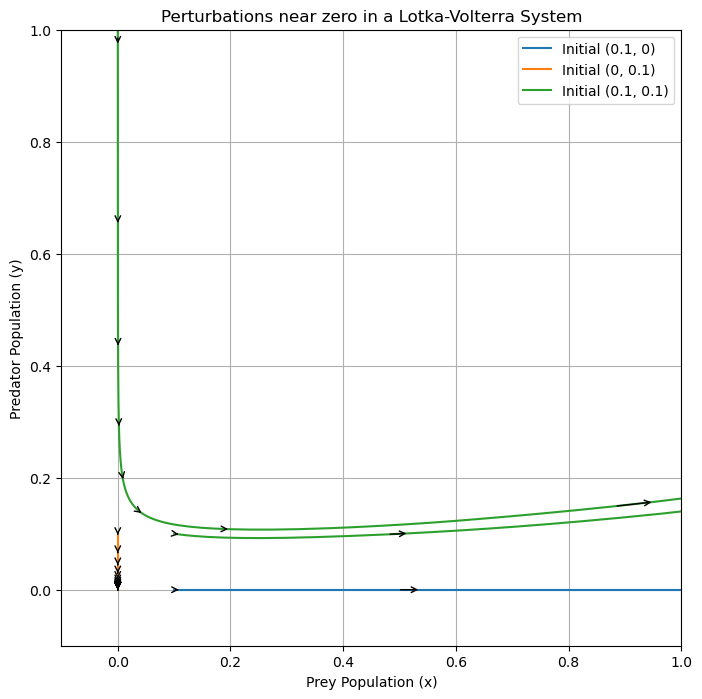

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def lotka_volterra_system(t, z, a, b, c, e):
    x, y = z
    dxdt = a * x - b * x * y
    dydt = c * x * y - e * y
    return [dxdt, dydt]


a, b, c, e = params[-1]

initial_conditions = [
    (0.1, 0),
    (0, 0.1),
    (0.1, 0.1),
]

t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

fig, ax = plt.subplots(figsize=(8, 8))

for x0, y0 in initial_conditions:
    sol = solve_ivp(
        lotka_volterra_system,
        t_span,
        [x0, y0],
        args=(a, b, c, e),
        t_eval=t_eval,
        dense_output=True,
    )
    ax.plot(sol.y[0], sol.y[1], label=f"Initial ({x0}, {y0})")

    # add arrows
    for i in range(0, len(sol.t) - 1, 20):  # select points
        dx = sol.y[0][i + 1] - sol.y[0][i]
        dy = sol.y[1][i + 1] - sol.y[1][i]
        ax.annotate(
            "",
            xy=(sol.y[0][i + 1], sol.y[1][i + 1]),
            xytext=(sol.y[0][i], sol.y[1][i]),
            arrowprops=dict(arrowstyle="->", color="black", lw=1),
        )

# Customize plot
ax.set_xlabel("Prey Population (x)")
ax.set_ylabel("Predator Population (y)")
ax.set_title("Perturbations near zero in a Lotka-Volterra System")
ax.set_xlim(-0.1, 1)
ax.set_ylim(-0.1, 1)
ax.grid()
ax.legend()

plt.show()

- Small peturbations quantitatively change the behaviour of the system -
from fixed point to a cycle or infinite growth
- Cycles that are close enough to (0, 0) can lead to extinction in real systems